## Sentiment Analysis in Financial Markets
### Exploratory Data Analysis

Analyze news articles, financial reports, or social media to gauge market sentiment. This project would involve natural language processing (NLP) techniques to understand how sentiment affects stock prices.

### Stocks to focus on 

- Tesla (Tsla)

- Apple Inc. (AAPL)

- Amazon.com Inc. (AMZN)

- Alphabet Inc. (GOOGL)

- Microsoft Corporation (MSFT)

- Facebook, Inc. (META)

- JPMorgan Chase & Co. (JPM)

- NVIDIA Corporation (NVDA)


### Textual data

In [13]:
import pandas as pd

In [14]:
df_text=pd.read_csv('data/textual/df_text.csv', sep=",")
df_text = df_text[['url', 'softTitle','title','date', 'author/1', 'description', 'keywords', 'text']]
df_text = df_text.rename(columns={'author/1': 'author' })

C:\Users\Ethan Vaz Falcao\AppData\Local\Temp\ipykernel_31572\3534584934.py:1: DtypeWarning: Columns (94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,132,133,134) have mixed types. Specify dtype option on import or set low_memory=False.
  df_text=pd.read_csv('data/textual/df_text.csv', sep=",")


In [15]:
df_text['date'].min()

'2008-09-15T07:26:49.000Z'

In [16]:
df_text['date'].max()

'2024-01-08T17:32:11.000Z'

In [17]:
start_date = '2010-01-01'
end_date = '2024-01-01'
df_text = df_text[(df_text['date'] >= start_date) & (df_text['date'] <= end_date)]
df_text.head(3)

,url,softTitle,title,date,author,description,keywords,text
0,https://www.cnbc.com/select/best-balance-trans...,11 best balance transfer cards with 0% APR of ...,11 best balance transfer cards with 0% APR of ...,2019-10-15T05:00:00.000Z,"Jason Stauffer,Brett Holzhauer",We analyzed 101 balance transfer cards using a...,"Approved for Apple,Select_Cards,Select_Monetiz...",Who's this for: The Citi Simplicity® Card has ...
1,https://www.cnbc.com/select/the-best-credit-ca...,The best credit cards for building credit of J...,The best credit cards for building credit of J...,2019-10-29T15:24:00.000Z,"Benji Stawski,Alexandria White",We analyzed 29 credit cards that are marketed ...,"Select: Credit Cards,Select_Monetized,Credit c...",If you lack a credit history or have poor cred...
2,https://www.cnbc.com/select/best-cash-back-cre...,The best cash-back credit cards of January 2024,The best cash-back credit cards of January 2024,2019-10-15T05:00:00.000Z,"Alexandria White,Jason Stauffer",We analyzed 50 of the most popular cash-back c...,"Select: Credit Cards,Consumer spending,Persona...",Who's this for? The Citi Double Cash® Card is ...


In [18]:
df_text.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9770 entries, 0 to 10002
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   url          9770 non-null   object
 1   softTitle    9770 non-null   object
 2   title        9770 non-null   object
 3   date         9770 non-null   object
 4   author       9565 non-null   object
 5   description  9746 non-null   object
 6   keywords     9362 non-null   object
 7   text         9770 non-null   object
dtypes: object(8)
memory usage: 687.0+ KB


In [19]:
df_text.isnull().sum()

url              0
softTitle        0
title            0
date             0
author         205
description     24
keywords       408
text             0
dtype: int64

In [23]:
# Convert date strings to datetime objects
df_text['date'] = pd.to_datetime(df_text['date'])

# Extract the year from the date and count the number of articles per year
articles_per_year = df_text['date'].dt.year.value_counts().sort_index()
articles_per_year

2010       1
2011       3
2012       5
2013       5
2014       4
2015      46
2016     142
2017     231
2018     396
2019     658
2020    1243
2021    1364
2022    2192
2023    3480
Name: date, dtype: int64

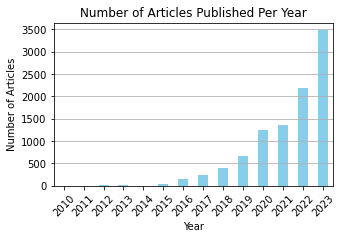

In [24]:
import matplotlib.pyplot as plt

# Plotting the data
plt.figure(figsize=(5, 3))
articles_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Articles Published Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.show()


#### Summary Statistics and Distribution

In [29]:
summary_stats = {
    'Total Articles': df_text.shape[0],
    'Columns': df_text.columns.tolist(),
    'Date Range': [df_text['date'].min(), df_text['date'].max()]
}

# Step 3: Text Content Analysis 
# Article Length (assuming 'description' or similar field contains the article content)
df_text['Article Length'] = df_text['description'].apply(lambda x: len(str(x).split()))

# Basic distribution of article lengths
article_length_stats = df_text['Article Length'].describe()
summary_stats,article_length_stats

({'Total Articles': 9770,
  'Columns': ['url',
   'softTitle',
   'title',
   'date',
   'author',
   'description',
   'keywords',
   'text',
   'Article Length'],
  'Date Range': [Timestamp('2010-04-23 15:37:59+0000', tz='UTC'),
   Timestamp('2023-12-31 17:00:01+0000', tz='UTC')]},
 count    9770.000000
 mean       22.941146
 std         6.836427
 min         1.000000
 25%        19.000000
 50%        23.000000
 75%        26.000000
 max        80.000000
 Name: Article Length, dtype: float64)

#### Author Distribution

In [30]:
# Focus on columns that seem to contain author information
author_columns = [col for col in df_text.columns if 'author' in col]

# Consolidate author information into a single column by concatenating the relevant columns
# This simple approach combines all author-related data, but individual parsing might be needed for more detailed analysis
df_text['Combined Authors'] = df_text[author_columns].apply(lambda x: ', '.join(x.dropna()), axis=1)

# Now, we count the number of articles by each unique author or combination of authors
author_distribution = df_text['Combined Authors'].value_counts()

# Display the top 10 most prolific authors or combinations of authors
author_distribution.head(10)

Jessica Dickler      361
Alexandria White     350
Elizabeth Gravier    348
Greg Iacurci         334
Annie Nova           282
Kate Dore, CFP®      264
Lorie Konish         245
CNBC.com staff       241
Jeff Cox             232
                     205
Name: Combined Authors, dtype: int64

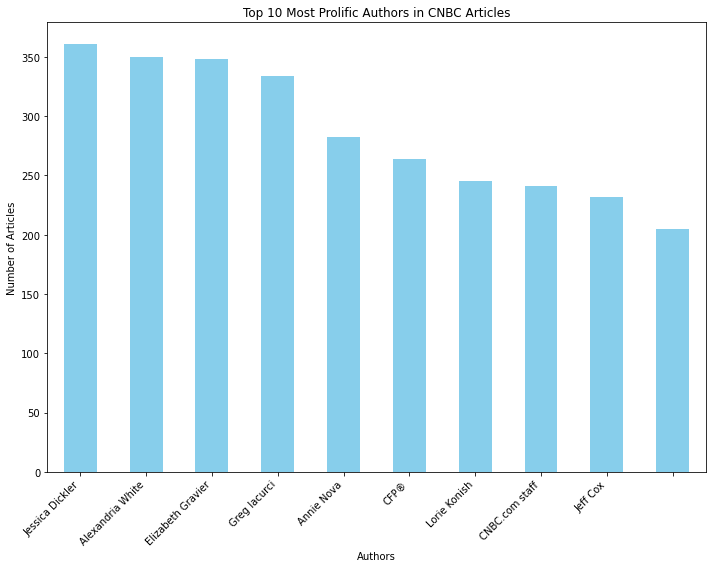

In [31]:
import matplotlib.pyplot as plt

# Selecting the top 10 most prolific authors for visualization
top_authors = author_distribution.head(10)

# Creating the bar plot
plt.figure(figsize=(10, 8))
top_authors.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Prolific Authors in CNBC Articles')
plt.xlabel('Authors')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha="right")

# Improve readability of the author names by removing the prefix and shortening long names
plt.xticks(ticks=range(len(top_authors)), labels=[name.split(', ')[-1][:20] + ('...' if len(name.split(', ')[-1]) > 20 else '') for name in top_authors.index])

plt.tight_layout()
plt.show()


#### Article Length - Word Count 

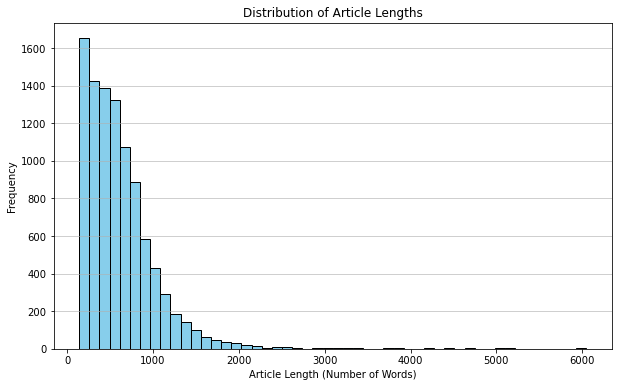

(None,
 count    9770.000000
 mean      618.747288
 std       438.953790
 min       138.000000
 25%       315.000000
 50%       529.000000
 75%       788.000000
 max      6048.000000
 Name: Article Length, dtype: float64)

In [32]:
# Calculate the length of articles using the 'text' column for a more accurate representation of content depth
df_text['Article Length'] = df_text['text'].apply(lambda x: len(str(x).split()))

# Summary statistics for article lengths
article_length_stats = df_text['Article Length'].describe()

# Visualize the distribution of article lengths
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df_text['Article Length'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Article Lengths')
plt.xlabel('Article Length (Number of Words)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show(), article_length_stats

#### Common Words and Phrases

In [35]:
from collections import Counter
import re

# Function to clean and tokenize text
def clean_tokenize(text):
    # Convert to lower case
    text = text.lower()
    # Remove URLs, special characters, and numbers
    text = re.sub(r'http\S+|www.\S+|\W|\d', ' ', text)
    # Tokenize by splitting the cleaned text
    tokens = text.split()
    # Remove short words (length < 3) and stopwords
    tokens = [word for word in tokens if word not in set(['cnbc', 'select', 'the', 'and']) and len(word) > 2]
    return tokens

# Apply the function to each description and aggregate tokens
all_tokens = sum(df_text['description'].dropna().apply(clean_tokenize), [])

# Count word frequencies
word_freq = Counter(all_tokens)

# Get the most common words and their counts
most_common_words = word_freq.most_common(20)

most_common_words


[('for', 2907),
 ('you', 2399),
 ('are', 1964),
 ('that', 1623),
 ('your', 1592),
 ('here', 1431),
 ('with', 1357),
 ('can', 1277),
 ('credit', 1243),
 ('how', 1121),
 ('from', 1061),
 ('have', 991),
 ('more', 983),
 ('their', 971),
 ('but', 911),
 ('has', 850),
 ('new', 818),
 ('year', 811),
 ('what', 795),
 ('its', 774)]

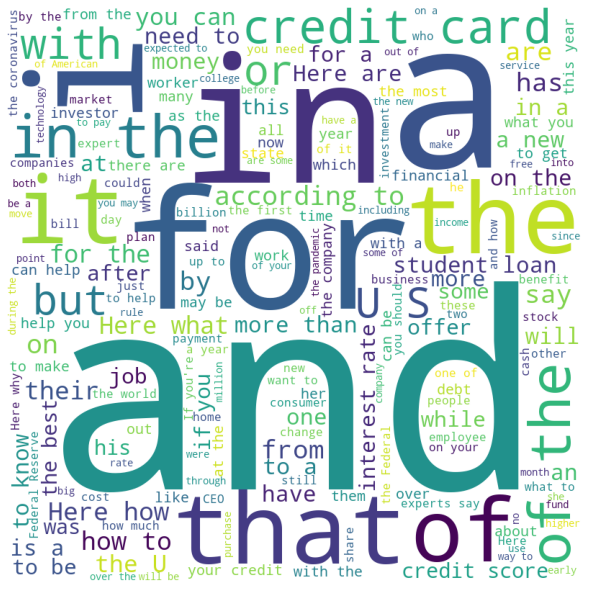

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all article descriptions into one large text
all_descriptions = ' '.join(df_text['description'].dropna())

# Generate a word cloud image
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = set(['CNBC', 'Select', 'select', 'https', 'com']), 
                min_font_size = 10).generate(all_descriptions)

# Plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()



#### Sentiment Distribution

In [36]:
# Import necessary libraries
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Download VADER lexicon for sentiment analysis
nltk.download('vader_lexicon')

# Initialize VADER sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Ensure there are no NaN values in the 'description' column for sentiment analysis
df_text['description'] = df_text['description'].fillna("")

# Apply VADER to analyze sentiment of each article's description
df_text['Sentiment Scores'] = df_text['description'].apply(lambda x: sia.polarity_scores(x))

# Extract compound scores to determine overall sentiment
df_text['Compound Score'] = df_text['Sentiment Scores'].apply(lambda x: x['compound'])

# Categorize overall sentiment based on compound score
df_text['Overall Sentiment'] = df_text['Compound Score'].apply(lambda x: 'Positive' if x > 0.05 else ('Negative' if x < -0.05 else 'Neutral'))

# Summary of sentiment distribution
sentiment_distribution = df_text['Overall Sentiment'].value_counts()

sentiment_distribution


[nltk_data] Downloading package vader_lexicon to C:\Users\Ethan Vaz
[nltk_data]     Falcao\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Positive    5363
Neutral     2233
Negative    2174
Name: Overall Sentiment, dtype: int64

https://www.nltk.org/    read this 

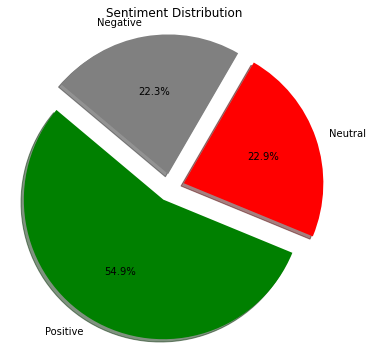

In [39]:
# Plot the sentiment distribution as a pie chart
plt.figure(figsize=(6, 6))
labels = sentiment_distribution.index
sizes = sentiment_distribution.values
colors = ['green', 'red', 'gray']  # You can choose different colors for the pie slices
explode = (0.1, 0.1, 0.1)  # To explode the slices if needed

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a title
plt.title("Sentiment Distribution")

# Display the pie chart
plt.show()